In [3]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Feature selection
from sklearn.feature_selection import SelectKBest, f_classif, RFE

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# SMOTE
from imblearn.over_sampling import SMOTE


In [4]:
# Mount Google Drive (if using Colab)
from google.colab import drive
drive.mount('/content/drive')

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/BreastCancer/BreastCancerData.csv')

# Strip whitespace from column names
df.columns = df.columns.str.strip()

print(df.columns)


Mounted at /content/drive
Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [5]:
# Drop irrelevant columns
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True, errors='ignore')

print(df.columns)


Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [6]:
# Fill categorical missing values (if any) with mode
df['diagnosis'] = df['diagnosis'].fillna(df['diagnosis'].mode()[0])

# Convert all columns except diagnosis to numeric
for col in df.columns:
    if col != 'diagnosis':
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill missing numeric values with column means
df.fillna(df.mean(numeric_only=True), inplace=True)


In [7]:
# Target variable
y = df['diagnosis']

# Drop the target and any non-numeric / irrelevant features
X = df.drop(['diagnosis', 'id', 'Unnamed: 32'], axis=1, errors='ignore')


In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [9]:
# Check class balance before SMOTE
print("Class distribution before SMOTE:\n", pd.Series(y).value_counts())

Class distribution before SMOTE:
 diagnosis
B    357
M    212
Name: count, dtype: int64


In [10]:
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_scaled, y)

# Check class balance after SMOTE
print("Class distribution after SMOTE:\n", pd.Series(y_smote).value_counts())


Class distribution after SMOTE:
 diagnosis
M    357
B    357
Name: count, dtype: int64


In [11]:
from sklearn.model_selection import train_test_split

# Split the balanced data 80:20
X_train, X_test, y_train, y_test = train_test_split(
    X_smote, y_smote, test_size=0.2, random_state=42, stratify=y_smote
)


# **Models on SMOTE Balanced DataSet**

In [12]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("🔍 Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


🔍 Logistic Regression
Accuracy: 0.986013986013986
Classification Report:
               precision    recall  f1-score   support

           B       0.99      0.99      0.99        72
           M       0.99      0.99      0.99        71

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143

Confusion Matrix:
 [[71  1]
 [ 1 70]]


In [13]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print("\n🔍 K-Nearest Neighbors")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))



🔍 K-Nearest Neighbors
Accuracy: 0.958041958041958
Classification Report:
               precision    recall  f1-score   support

           B       0.95      0.97      0.96        72
           M       0.97      0.94      0.96        71

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

Confusion Matrix:
 [[70  2]
 [ 4 67]]


In [14]:
# Support Vector Classifier
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("\n🔍 Support Vector Machine")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))



🔍 Support Vector Machine
Accuracy: 0.972027972027972
Classification Report:
               precision    recall  f1-score   support

           B       0.95      1.00      0.97        72
           M       1.00      0.94      0.97        71

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

Confusion Matrix:
 [[72  0]
 [ 4 67]]


In [15]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\n🔍 Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))



🔍 Random Forest
Accuracy: 0.9790209790209791
Classification Report:
               precision    recall  f1-score   support

           B       0.97      0.99      0.98        72
           M       0.99      0.97      0.98        71

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

Confusion Matrix:
 [[71  1]
 [ 2 69]]


In [16]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("\n🔍 Decision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))



🔍 Decision Tree
Accuracy: 0.916083916083916
Classification Report:
               precision    recall  f1-score   support

           B       0.92      0.92      0.92        72
           M       0.92      0.92      0.92        71

    accuracy                           0.92       143
   macro avg       0.92      0.92      0.92       143
weighted avg       0.92      0.92      0.92       143

Confusion Matrix:
 [[66  6]
 [ 6 65]]


# **SelectKBest from DataSet**

20 Features


In [17]:
from sklearn.feature_selection import SelectKBest, f_classif

# Apply SelectKBest to select top 20 features
kbest_selector = SelectKBest(score_func=f_classif, k=20)
X_kbest20 = kbest_selector.fit_transform(X_smote, y_smote)

# Get feature names
selected_kbest_mask = kbest_selector.get_support()
selected_kbest_features = X.columns[selected_kbest_mask]
print("🎯 Top 20 Features:\n", selected_kbest_features.tolist())


🎯 Top 20 Features:
 ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se', 'area_se', 'concave points_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst']


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_kbest20_scaled = scaler.fit_transform(X_kbest20)

from sklearn.model_selection import train_test_split

X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(
    X_kbest20_scaled, y_smote, test_size=0.2, random_state=42, stratify=y_smote
)


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lr_20 = LogisticRegression(max_iter=1000, random_state=42)
lr_20.fit(X_train_20, y_train_20)
y_pred_lr_20 = lr_20.predict(X_test_20)

print("🔍 Logistic Regression (Top 20 Features)")
print("Accuracy:", accuracy_score(y_test_20, y_pred_lr_20))
print("Classification Report:\n", classification_report(y_test_20, y_pred_lr_20))
print("Confusion Matrix:\n", confusion_matrix(y_test_20, y_pred_lr_20))


🔍 Logistic Regression (Top 20 Features)
Accuracy: 0.9790209790209791
Classification Report:
               precision    recall  f1-score   support

           B       0.97      0.99      0.98        72
           M       0.99      0.97      0.98        71

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

Confusion Matrix:
 [[71  1]
 [ 2 69]]


In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn_20 = KNeighborsClassifier(n_neighbors=5)
knn_20.fit(X_train_20, y_train_20)
y_pred_knn_20 = knn_20.predict(X_test_20)

print("\n🔍 KNN (Top 20 Features)")
print("Accuracy:", accuracy_score(y_test_20, y_pred_knn_20))
print("Classification Report:\n", classification_report(y_test_20, y_pred_knn_20))
print("Confusion Matrix:\n", confusion_matrix(y_test_20, y_pred_knn_20))



🔍 KNN (Top 20 Features)
Accuracy: 0.958041958041958
Classification Report:
               precision    recall  f1-score   support

           B       0.95      0.97      0.96        72
           M       0.97      0.94      0.96        71

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

Confusion Matrix:
 [[70  2]
 [ 4 67]]


In [21]:
from sklearn.svm import SVC

svm_20 = SVC(kernel='rbf', random_state=42)
svm_20.fit(X_train_20, y_train_20)
y_pred_svm_20 = svm_20.predict(X_test_20)

print("\n🔍 SVM (Top 20 Features)")
print("Accuracy:", accuracy_score(y_test_20, y_pred_svm_20))
print("Classification Report:\n", classification_report(y_test_20, y_pred_svm_20))
print("Confusion Matrix:\n", confusion_matrix(y_test_20, y_pred_svm_20))



🔍 SVM (Top 20 Features)
Accuracy: 0.972027972027972
Classification Report:
               precision    recall  f1-score   support

           B       0.96      0.99      0.97        72
           M       0.99      0.96      0.97        71

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

Confusion Matrix:
 [[71  1]
 [ 3 68]]


In [22]:
from sklearn.ensemble import RandomForestClassifier

rf_20 = RandomForestClassifier(random_state=42)
rf_20.fit(X_train_20, y_train_20)
y_pred_rf_20 = rf_20.predict(X_test_20)

print("\n🔍 Random Forest (Top 20 Features)")
print("Accuracy:", accuracy_score(y_test_20, y_pred_rf_20))
print("Classification Report:\n", classification_report(y_test_20, y_pred_rf_20))
print("Confusion Matrix:\n", confusion_matrix(y_test_20, y_pred_rf_20))



🔍 Random Forest (Top 20 Features)
Accuracy: 0.986013986013986
Classification Report:
               precision    recall  f1-score   support

           B       0.97      1.00      0.99        72
           M       1.00      0.97      0.99        71

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143

Confusion Matrix:
 [[72  0]
 [ 2 69]]


In [23]:
from sklearn.tree import DecisionTreeClassifier

dt_20 = DecisionTreeClassifier(random_state=42)
dt_20.fit(X_train_20, y_train_20)
y_pred_dt_20 = dt_20.predict(X_test_20)

print("\n🔍 Decision Tree (Top 20 Features)")
print("Accuracy:", accuracy_score(y_test_20, y_pred_dt_20))
print("Classification Report:\n", classification_report(y_test_20, y_pred_dt_20))
print("Confusion Matrix:\n", confusion_matrix(y_test_20, y_pred_dt_20))



🔍 Decision Tree (Top 20 Features)
Accuracy: 0.9300699300699301
Classification Report:
               precision    recall  f1-score   support

           B       0.92      0.94      0.93        72
           M       0.94      0.92      0.93        71

    accuracy                           0.93       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143

Confusion Matrix:
 [[68  4]
 [ 6 65]]


# **RFE to Select Top 15 Features from Top 20**

In [24]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Base model for RFE
rf_base = RandomForestClassifier(random_state=42)

# Apply RFE to select top 15 features
rfe_selector_15 = RFE(estimator=rf_base, n_features_to_select=15)
X_rfe15 = rfe_selector_15.fit_transform(X_kbest20, y_smote)

# Get selected feature names from the original top 20
rfe15_mask = rfe_selector_15.get_support()
selected_features_15 = selected_kbest_features[rfe15_mask]  # same index from earlier
print("📌 Top 15 Features (from Top 20):\n", selected_features_15.tolist())


📌 Top 15 Features (from Top 20):
 ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst']


In [25]:
# Standardize the top 15 features
X_rfe15_scaled = scaler.fit_transform(X_rfe15)


In [26]:
X_train_15, X_test_15, y_train_15, y_test_15 = train_test_split(
    X_rfe15_scaled, y_smote, test_size=0.2, random_state=42, stratify=y_smote
)


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lr_15 = LogisticRegression(max_iter=1000, random_state=42)
lr_15.fit(X_train_15, y_train_15)
y_pred_lr_15 = lr_15.predict(X_test_15)

print("🔍 Logistic Regression (Top 15 Features)")
print("Accuracy:", accuracy_score(y_test_15, y_pred_lr_15))
print("Classification Report:\n", classification_report(y_test_15, y_pred_lr_15))
print("Confusion Matrix:\n", confusion_matrix(y_test_15, y_pred_lr_15))


🔍 Logistic Regression (Top 15 Features)
Accuracy: 0.965034965034965
Classification Report:
               precision    recall  f1-score   support

           B       0.95      0.99      0.97        72
           M       0.99      0.94      0.96        71

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.97       143
weighted avg       0.97      0.97      0.97       143

Confusion Matrix:
 [[71  1]
 [ 4 67]]


In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn_15 = KNeighborsClassifier(n_neighbors=5)
knn_15.fit(X_train_15, y_train_15)
y_pred_knn_15 = knn_15.predict(X_test_15)

print("\n🔍 KNN (Top 15 Features)")
print("Accuracy:", accuracy_score(y_test_15, y_pred_knn_15))
print("Classification Report:\n", classification_report(y_test_15, y_pred_knn_15))
print("Confusion Matrix:\n", confusion_matrix(y_test_15, y_pred_knn_15))



🔍 KNN (Top 15 Features)
Accuracy: 0.965034965034965
Classification Report:
               precision    recall  f1-score   support

           B       0.95      0.99      0.97        72
           M       0.99      0.94      0.96        71

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.97       143
weighted avg       0.97      0.97      0.97       143

Confusion Matrix:
 [[71  1]
 [ 4 67]]


In [29]:
from sklearn.svm import SVC

svm_15 = SVC(kernel='rbf', random_state=42)
svm_15.fit(X_train_15, y_train_15)
y_pred_svm_15 = svm_15.predict(X_test_15)

print("\n🔍 SVM (Top 15 Features)")
print("Accuracy:", accuracy_score(y_test_15, y_pred_svm_15))
print("Classification Report:\n", classification_report(y_test_15, y_pred_svm_15))
print("Confusion Matrix:\n", confusion_matrix(y_test_15, y_pred_svm_15))



🔍 SVM (Top 15 Features)
Accuracy: 0.965034965034965
Classification Report:
               precision    recall  f1-score   support

           B       0.94      1.00      0.97        72
           M       1.00      0.93      0.96        71

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143

Confusion Matrix:
 [[72  0]
 [ 5 66]]


In [30]:
from sklearn.ensemble import RandomForestClassifier

rf_15 = RandomForestClassifier(random_state=42)
rf_15.fit(X_train_15, y_train_15)
y_pred_rf_15 = rf_15.predict(X_test_15)

print("\n🔍 Random Forest (Top 15 Features)")
print("Accuracy:", accuracy_score(y_test_15, y_pred_rf_15))
print("Classification Report:\n", classification_report(y_test_15, y_pred_rf_15))
print("Confusion Matrix:\n", confusion_matrix(y_test_15, y_pred_rf_15))



🔍 Random Forest (Top 15 Features)
Accuracy: 0.986013986013986
Classification Report:
               precision    recall  f1-score   support

           B       0.97      1.00      0.99        72
           M       1.00      0.97      0.99        71

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143

Confusion Matrix:
 [[72  0]
 [ 2 69]]


In [31]:
from sklearn.tree import DecisionTreeClassifier

dt_15 = DecisionTreeClassifier(random_state=42)
dt_15.fit(X_train_15, y_train_15)
y_pred_dt_15 = dt_15.predict(X_test_15)

print("\n🔍 Decision Tree (Top 15 Features)")
print("Accuracy:", accuracy_score(y_test_15, y_pred_dt_15))
print("Classification Report:\n", classification_report(y_test_15, y_pred_dt_15))
print("Confusion Matrix:\n", confusion_matrix(y_test_15, y_pred_dt_15))



🔍 Decision Tree (Top 15 Features)
Accuracy: 0.9370629370629371
Classification Report:
               precision    recall  f1-score   support

           B       0.93      0.94      0.94        72
           M       0.94      0.93      0.94        71

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143

Confusion Matrix:
 [[68  4]
 [ 5 66]]


# **SHAP (SHapley Additive exPlanations) helps explain how each feature contributes to a model’s prediction**

In [32]:
!pip install shap

import shap
import matplotlib.pyplot as plt

# Initialize JavaScript visualizations
shap.initjs()

# Convert scaled X_rfe15 (numpy array) to DataFrame for SHAP
X_rfe15_df = pd.DataFrame(X_rfe15_scaled, columns=selected_features_15)


**1. Logistic Regression**

  0%|          | 0/714 [00:00<?, ?it/s]

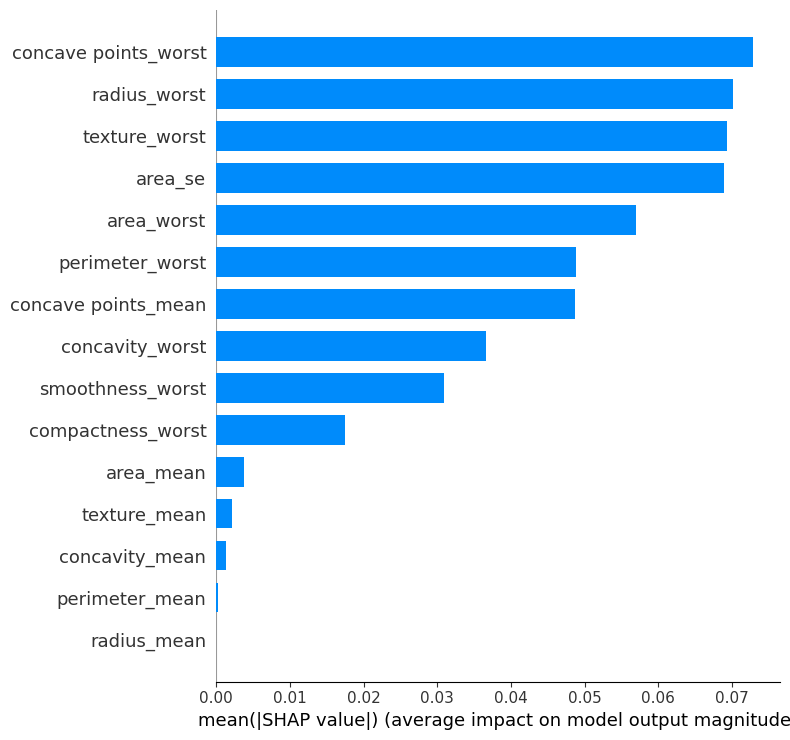

In [33]:
# SHAP for Logistic Regression

# Use KernelExplainer for linear models
explainer_lr = shap.KernelExplainer(lr_15.predict_proba, X_rfe15_df)
shap_values_lr = explainer_lr.shap_values(X_rfe15_df)

# (0:B), (1:M)
shap_values_class1 = shap_values_lr[:, :, 1]

# Plot summary
shap.summary_plot(shap_values_class1, X_rfe15_df, plot_type='bar')


**2. KNN**

  0%|          | 0/714 [00:00<?, ?it/s]

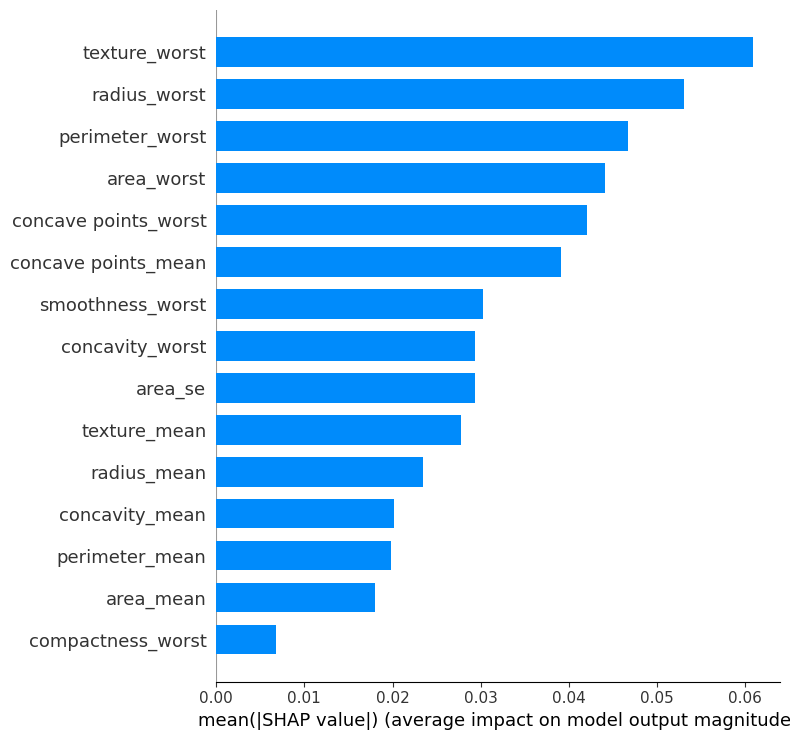

In [34]:
# SHAP for KNN

# ⚡️ Sample fewer background data points for speed
background_knn = shap.sample(X_rfe15_df, 100, random_state=42)

# 🧠 Use predict_proba for class probabilities
explainer_knn = shap.KernelExplainer(knn_15.predict_proba, background_knn)

# ⚠️ This may take a few minutes
shap_values_knn = explainer_knn.shap_values(X_rfe15_df)

# Extract SHAP values for class 1 (0:B), (1:M)
shap_values_knn_class1 = shap_values_knn[:, :, 1]

# 📊 Plot SHAP summary
shap.summary_plot(shap_values_knn_class1, X_rfe15_df, plot_type='bar')


📌 Analogy:
Imagine you're trying to understand how a student's score compares to a reference group:

Background group = a sample of 100 students across schools

Target students = all 728 students in your current class whose performance you want to explain

You use the background group to judge how much each feature (e.g., study hours, attendance) contributes to each student's score.

**3. SVM**

In [35]:
from sklearn.svm import SVC

# 🔁 Retrain SVM with probability=True
svm_15_prob = SVC(kernel='rbf', probability=True, random_state=42)
svm_15_prob.fit(X_train_15, y_train_15)



SVC(probability=True, random_state=42)

  0%|          | 0/714 [00:00<?, ?it/s]

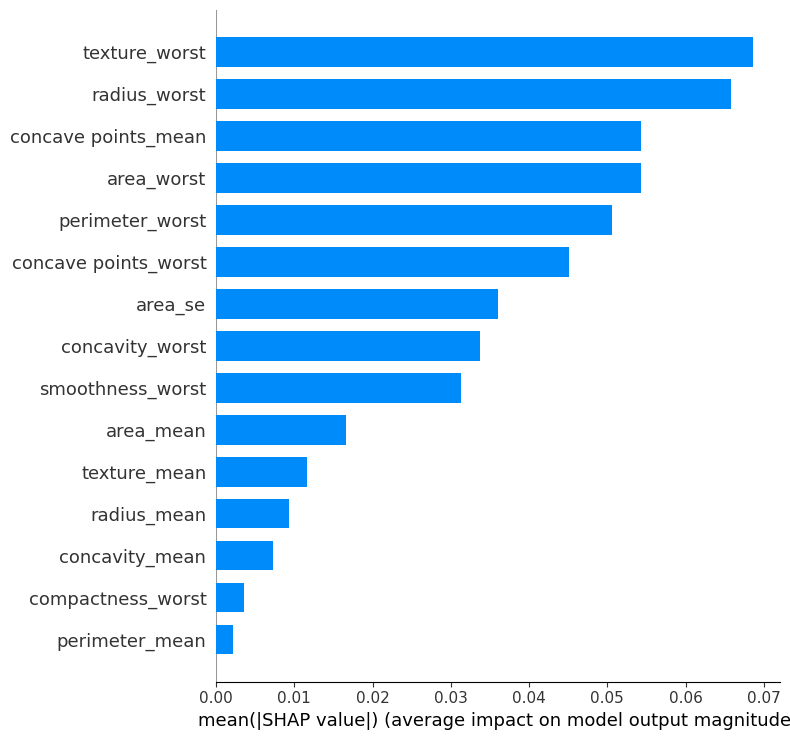

In [36]:
# Sample background to speed up SHAP
background_svm = shap.sample(X_rfe15_df, 100, random_state=42)

# Initialize SHAP explainer
explainer_svm = shap.KernelExplainer(svm_15_prob.predict_proba, background_svm)

# Compute SHAP values (may take a few mins)
shap_values_svm = explainer_svm.shap_values(X_rfe15_df)

# Extract SHAP values for class 1 (0:B), (1:M)
shap_values_svm_class1 = shap_values_svm[:, :, 1]

# Plot summary
shap.summary_plot(shap_values_svm_class1, X_rfe15_df, plot_type='bar')


**4. Random Forest**

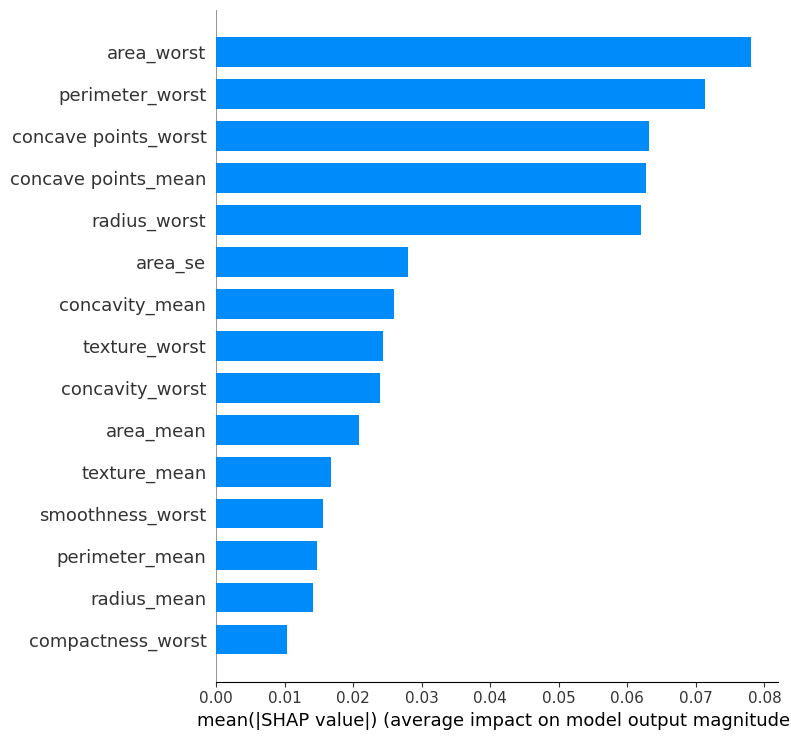

In [37]:
# Initialize TreeExplainer for Random Forest
explainer_rf = shap.TreeExplainer(rf_15)

# Compute SHAP values (fast for tree-based models)
shap_values_rf = explainer_rf.shap_values(X_rfe15_df)

# Extract class 1 (0:B), (1:M), SHAP values from 3D array
shap_values_rf_class1 = shap_values_rf[:, :, 1]  # shape: (714, 10)

# Plot summary (bar chart)
shap.summary_plot(shap_values_rf_class1, X_rfe15_df, plot_type='bar')


**5. Decision Tree**

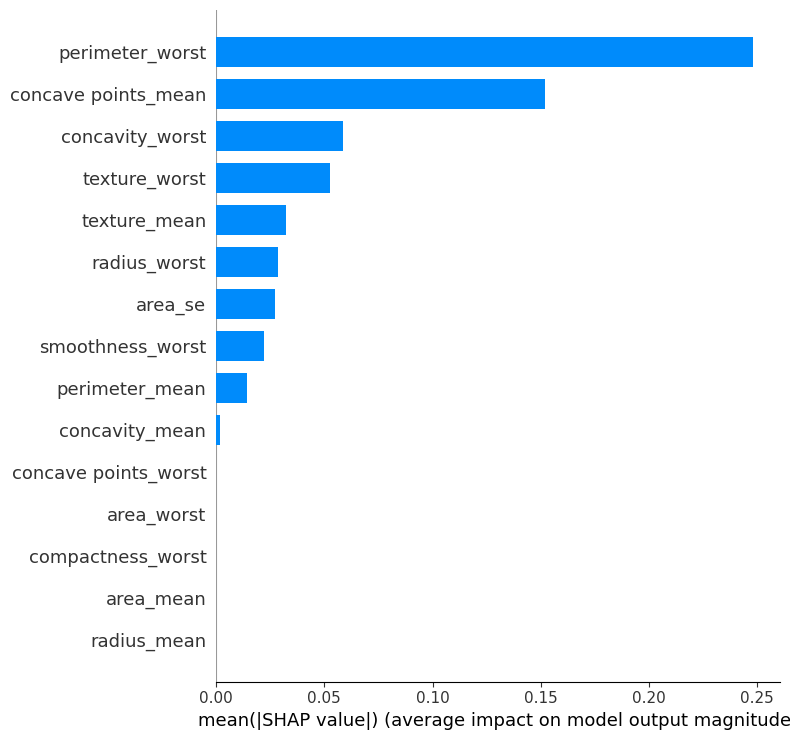

In [38]:
# Initialize SHAP TreeExplainer for Decision Tree
explainer_dt = shap.TreeExplainer(dt_15)

# Compute SHAP values
shap_values_dt = explainer_dt.shap_values(X_rfe15_df)

# Extract SHAP values for class 1 (0:B), (1:M)
shap_values_dt_class1 = shap_values_dt[:, :, 1]

# Plot bar summary
shap.summary_plot(shap_values_dt_class1, X_rfe15_df, plot_type='bar')
